# Experimenting with Cross Entropy as a Loss Function
*Work in progress!!*

Cross entropy a method that can be used to calculate the loss of a categorisation neural network. It's the equivalent of Mean Squared Error used from training for regression.

Where $q$ is the estimated probability distribution and $p$ is the true distribution, the cross entropy for discrete (as opposed to continuous) distributions is given as:

$$H(p,q) = - \sum_{x\epsilon\chi} p(x)\,log\,q(x)$$

In the case of the a neural network, $q$ would be the activations at the final layer.

$$A_{l} = \{\sigma_{l}\sum w_{i}a_{(l-1)}\}$$

In [262]:
import math
import matplotlib.pyplot as plt

In [263]:
p = [0., 0., 1., 0., 0.]
q1 = [0., 0., 1., 0., 0.]
q2 = [0.2, 0.2, 0.2, 0.2, 0.2]

In [264]:
def calculate_cross_entropy_loss(predicted, actual):
    sum = 0.
    for x in range(len(predicted)):
        if predicted[x] > 0.:
            sum += actual[x] * math.log(predicted[x])
    return -sum

In [265]:
print(f'Loss for q1: {calculate_cross_entropy_loss(q1, p)}')
print(f'Loss for q2: {calculate_cross_entropy_loss(q2, p)}')

Loss for q1: -0.0
Loss for q2: 1.6094379124341003


If we want to use this in a gradient descent then we have to calculate a gradient with respect to each category of $p$.

In [266]:
def calculate_cross_entropy_loss_with_gradients(predicted, actual):
    sum = 0.
    grads = [0. for i in predicted]
    
    for x in range(len(predicted)):
        if predicted[x] > 0.:
            sum += actual[x] * math.log(predicted[x])
            
        # this doesn't feel right, isn't it just MSE?
        grads[x] = 2 * (predicted[x] - actual[x])
    
    return -sum, grads

In [267]:
calculate_cross_entropy_loss_with_gradients(q2, p)

(1.6094379124341003, [0.4, 0.4, -1.6, 0.4, 0.4])

In [268]:
learning_rate = 0.01
num_epochs = 200

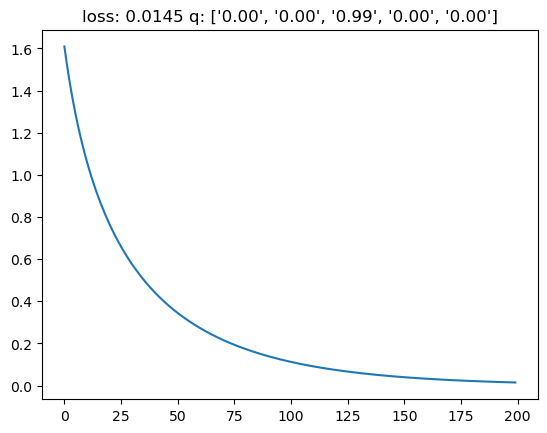

In [269]:
losses = [0] * num_epochs

for epoch in range(200):
    loss, gradients = calculate_cross_entropy_loss_with_gradients(q2, p)
    losses[epoch] = loss
    for i, c in enumerate(q2):
        q2[i] -= learning_rate * gradients[i]
    
stats = f'loss: {loss:.4f} q: {[f"{q:.2f}" for q in q2]}'

plt.plot(losses)
plt.title(stats)
plt.show()